<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/analize_of_trust_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 【問題1】コンペティション内容の把握

①Home Creditはどのような企業？
　・銀行口座を持たない人々に、前向きで安全な借り入れ体験を提供することで、金融包摂の拡大を図る。
②このコンペティションでは何を予測する？
　・電話番号や取引情報などの様々なデータを利用して、顧客の返済能力を予測する。
③それを予測することで企業が得られるメリットは何？
　・返済能力のある顧客が拒絶されることなく、必要な元金、満期、返済カレンダーでの融資を可能にする。

## 【問題2】データの概観の把握

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
DATA_DIR='C:/Users/es/Documents/Python Scripts/1.Jan/Week3/data/application_train.csv (1)/'
data = pd.read_csv(f'{DATA_DIR}application_train.csv')

In [ ]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [ ]:
# dataデータの先頭5行を表示
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

①　目的変数はカラム名が「TARGET」で、2値（支払困難、支払可能）項目である。\
②　特徴量の最有力候補となる項目は「契約条件」、「性別」、「自動車所有か否か」、「所有不動産の有無」、「子供の数」、「収入」、\
　「ローン合計」などがあり、全部で120項目が存在する。値が数字ではない項目があり、ダミー変数化が必要になる。

In [ ]:
# カラム名を表示
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
# 項目ごとの欠損値の数と全行に対する割合を表示
for col_name in data.columns:
  missing_num = sum(pd.isnull(data[col_name]))
  print('{} : missing {} , missing_ratio {:.1f}%'.format(col_name, missing_num , missing_num / len(data) * 100))

SK_ID_CURR : missing 0 , missing_ratio 0.0%
TARGET : missing 0 , missing_ratio 0.0%
NAME_CONTRACT_TYPE : missing 0 , missing_ratio 0.0%
CODE_GENDER : missing 0 , missing_ratio 0.0%
FLAG_OWN_CAR : missing 0 , missing_ratio 0.0%
FLAG_OWN_REALTY : missing 0 , missing_ratio 0.0%
CNT_CHILDREN : missing 0 , missing_ratio 0.0%
AMT_INCOME_TOTAL : missing 0 , missing_ratio 0.0%
AMT_CREDIT : missing 0 , missing_ratio 0.0%
AMT_ANNUITY : missing 12 , missing_ratio 0.0%
AMT_GOODS_PRICE : missing 278 , missing_ratio 0.1%
NAME_TYPE_SUITE : missing 1292 , missing_ratio 0.4%
NAME_INCOME_TYPE : missing 0 , missing_ratio 0.0%
NAME_EDUCATION_TYPE : missing 0 , missing_ratio 0.0%
NAME_FAMILY_STATUS : missing 0 , missing_ratio 0.0%
NAME_HOUSING_TYPE : missing 0 , missing_ratio 0.0%
REGION_POPULATION_RELATIVE : missing 0 , missing_ratio 0.0%
DAYS_BIRTH : missing 0 , missing_ratio 0.0%
DAYS_EMPLOYED : missing 0 , missing_ratio 0.0%
DAYS_REGISTRATION : missing 0 , missing_ratio 0.0%
DAYS_ID_PUBLISH : missing 0

In [ ]:
# 5つ以上欠損値がある特徴量（列）は削除する。
data=data.dropna(thresh=len(data)-4, axis=1)

# 欠損値があるサンプル（行）は削除する。
data = data.dropna(how='any')

In [ ]:
# 項目ごとの欠損値の数と全行に対する割合を表示
for col_name in data.columns:
  missing_num = sum(pd.isnull(data[col_name]))
  print('{} : missing {} , missing_ratio {:.1f}%'.format(col_name, missing_num , missing_num / len(data) * 100))

SK_ID_CURR : missing 0 , missing_ratio 0.0%
TARGET : missing 0 , missing_ratio 0.0%
NAME_CONTRACT_TYPE : missing 0 , missing_ratio 0.0%
CODE_GENDER : missing 0 , missing_ratio 0.0%
FLAG_OWN_CAR : missing 0 , missing_ratio 0.0%
FLAG_OWN_REALTY : missing 0 , missing_ratio 0.0%
CNT_CHILDREN : missing 0 , missing_ratio 0.0%
AMT_INCOME_TOTAL : missing 0 , missing_ratio 0.0%
AMT_CREDIT : missing 0 , missing_ratio 0.0%
NAME_INCOME_TYPE : missing 0 , missing_ratio 0.0%
NAME_EDUCATION_TYPE : missing 0 , missing_ratio 0.0%
NAME_FAMILY_STATUS : missing 0 , missing_ratio 0.0%
NAME_HOUSING_TYPE : missing 0 , missing_ratio 0.0%
REGION_POPULATION_RELATIVE : missing 0 , missing_ratio 0.0%
DAYS_BIRTH : missing 0 , missing_ratio 0.0%
DAYS_EMPLOYED : missing 0 , missing_ratio 0.0%
DAYS_REGISTRATION : missing 0 , missing_ratio 0.0%
DAYS_ID_PUBLISH : missing 0 , missing_ratio 0.0%
FLAG_MOBIL : missing 0 , missing_ratio 0.0%
FLAG_EMP_PHONE : missing 0 , missing_ratio 0.0%
FLAG_WORK_PHONE : missing 0 , missi

In [ ]:
# dataデータの先頭5行を表示
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


自動車の所有時の年齢、職業タイプ、EXT_SOURCE以降（FLAG_DOCUMENT以外の項目）の欠損値が多い。

In [ ]:
# dataデータの行数、平均値、標準偏差、最小値、先頭25%の値、先頭50%の値、先頭75%の値、最大値
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307508.000000,307508.00000,307508.000000,3.075080e+05,3.075080e+05,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.0,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.00000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000
mean,278181.332947,0.08073,0.417056,1.687970e+05,5.990268e+05,0.020868,-16037.041560,63815.673956,-4986.137584,-2994.208382,1.0,0.819888,0.199367,0.998133,0.281066,0.056720,2.152666,2.052464,2.031521,12.063400,0.015144,0.050766,0.040656,0.078174,0.230453,0.179553,-962.860075,0.000042,0.710030,0.000081,0.015112,0.088056,0.000189,0.081373,0.003896,0.000023,0.003912,0.000007,0.003525,0.002937,0.00121,0.009928,0.000267,0.008127,0.000595,0.000507,0.000335
std,102789.982905,0.27242,0.722124,2.371237e+05,4.024923e+05,0.013831,4363.980429,141276.312548,3522.896819,1509.449226,0.0,0.384282,0.399525,0.043164,0.449520,0.231308,0.910683,0.509036,0.502739,3.265842,0.122127,0.219520,0.197492,0.268445,0.421123,0.383815,826.810973,0.006502,0.453749,0.009016,0.121998,0.283377,0.013732,0.273408,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099145,0.016328,0.089781,0.024388,0.022518,0.018299
min,100002.000000,0.00000,0.000000,2.565000e+04,4.500000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189146.750000,0.00000,0.000000,1.125000e+05,2.700000e+05,0.010006,-19682.000000,-2760.000000,-7480.000000,-4299.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.500000,0.00000,0.000000,1.471500e+05,5.135310e+05,0.018850,-15750.000000,-1214.000000,-4504.000000,-3254.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367143.250000,0.00000,1.000000,2.025000e+05,8.086500e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

平均、標準偏差、上下25%の値より、グラフの分布がわかる。

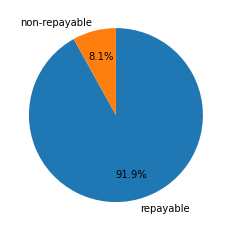

In [ ]:
# 返済、返済不可のそれぞれの割合を表示
label = ['repayable','non-repayable']
 
plt.pie(data['TARGET'].value_counts(),
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)
 
plt.show()

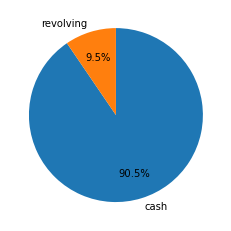

In [ ]:
# 契約タイプ別の割合を表示
label = ['cash','revolving']
 
plt.pie(data['NAME_CONTRACT_TYPE'].value_counts(),
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)
 
plt.show()

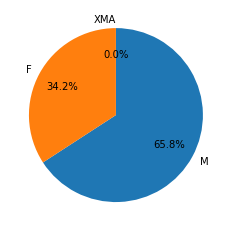

In [ ]:
# 性別の割合を表示
label = ['M','F','XMA']
 
plt.pie(data['CODE_GENDER'].value_counts(),
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)
 
plt.show()

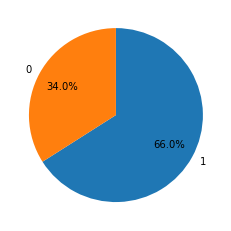

In [ ]:
# 自動車保有有無の割合を表示
label = ['1','0']
 
plt.pie(data['FLAG_OWN_CAR'].value_counts(),
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)
 
plt.show()

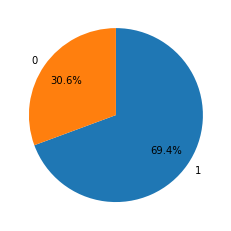

In [ ]:
# 不動産所有有無の割合を表示
label = ['1','0']
 
plt.pie(data['FLAG_OWN_REALTY'].value_counts(),
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)
 
plt.show()

# 【問題3】課題設定

1.特徴量の性質\
　①2値項目で値が数字以外のデータがあるため、ダミー変数化する。\
　②2値項目であるはず（例：男女）が、2値以外の値が存在する項目があるため、削除する。\
　③null値が大量に存在する項目があるため、必要に応じて項目ごと削除する。\
　④特徴量の候補となる項目数が120項目存在するため、相関係数行列で関係性を可視化し、目的変数と相関が高い上位の項目を選出する。\
 2.調査する内容\
　①2値項目のカテゴリにおける不履行状況を確認する。\
　②多値項目のカテゴリにおける不履行状況を確認する。\
　③離散数値に対する不履行状況を確認する。\
　④連続数値に対する不履行状況を確認する。\
1,2を精査し、特徴量を決定する。

# 【問題4】データ探索

In [ ]:
cor_data = data.corr()
cor_data

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,1.000000,-0.002111,-0.001134,-0.001817,-0.000346,0.000843,-0.001489,0.001363,-0.000972,-0.000383,NaN,-0.001333,-0.000408,0.002815,0.002757,0.000279,-0.002896,-0.001075,-0.001138,0.000355,-0.000284,0.001114,0.002922,-0.001887,-0.001577,0.000074,-0.000858,0.000700,-0.003424,-0.004139,-0.001065,0.002119,-0.002807,0.001825,0.001504,-0.000815,-0.002013,-0.001045,0.000896,-0.001078,0.002603,-0.000725,0.001450,0.000565,0.000167,0.001073,0.000282
TARGET,-0.002111,1.000000,0.019186,-0.003981,-0.030370,-0.037228,0.078243,-0.044933,0.041976,0.051459,NaN,0.045984,0.028526,0.000370,-0.023806,-0.001759,0.009308,0.058899,0.060893,-0.024164,0.005576,0.006946,0.002824,0.044395,0.050996,0.032520,0.055219,0.005417,0.044342,-0.002672,-0.000308,-0.028603,-0.001462,-0.008038,-0.004353,-0.001414,-0.004230,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007943,-0.001358,0.000215,0.003709
CNT_CHILDREN,-0.001134,0.019186,1.000000,0.012884,0.002144,-0.025574,0.330947,-0.239821,0.183399,-0.028017,NaN,0.240717,0.055632,-0.000794,-0.029905,0.022617,0.879161,0.025422,0.024781,-0.007289,-0.013320,0.008192,0.014844,0.020070,0.070652,0.069960,-0.005864,0.001786,0.056829,-0.003709,-0.016724,-0.157026,-0.001374,0.051703,-0.001998,-0.002756,-0.005318,0.000293,0.003944,-0.005460,0.003609,0.010662,0.000773,0.004052,0.000864,0.000988,-0.002450
AMT_INCOME_TOTAL,-0.001817,-0.003981,0.012884,1.000000,0.156870,0.074797,0.027259,-0.064222,0.027803,0.008510,NaN,0.063993,-0.017201,-0.008290,0.000153,0.038379,0.016341,-0.085465,-0.091735,0.036456,0.031192,0.062326,0.058042,0.003575,0.006424,0.008277,-0.018586,-0.001000,-0.016746,0.000529,0.001476,-0.045877,0.003824,0.072455,0.018389,0.000290,0.002315,0.002540,0.022747,0.020708,0.010793,0.007269,0.002231,0.003137,0.002408,0.000242,-0.000589
AMT_CREDIT,-0.000346,-0.030370,0.002144,0.156870,1.000000,0.099737,-0.055432,-0.066839,0.009621,-0.006571,NaN,0.065520,-0.021087,0.023653,0.026210,0.016631,0.063159,-0.101777,-0.110916,0.052738,0.024010,0.051927,0.052608,-0.026887,-0.018859,0.000078,-0.073701,0.008905,0.096363,0.000630,-0.011763,-0.046717,-0.004066,0.082830,0.022602,-0.003100,0.028986,0.003857,0.052429,0.048828,0.032252,0.061925,0.011743,0.034365,0.021082,0.031023,-0.016148
REGION_POPULATION_RELATIVE,0.000843,-0.037228,-0.025574,0.074797,0.099737,1.000000,-0.029579,-0.003980,-0.053821,-0.003994,NaN,0.004045,-0.015625,-0.012478,0.090941,0.040012,-0.024209,-0.532878,-0.531537,0.171286,0.002118,0.056952,0.081025,-0.050500,-0.044055,-0.015185,-0.044014,-0.003040,-0.084647,0.008102,0.016045,0.000727,0.002278,0.088534,0.038434,0.001992,0.024632,-0.000404,0.031186,0.032202,0.009446,0.006313,0.007414,0.013396,0.002364,-0.000045,0.003437
DAYS_BIRTH,-0.001489,0.078243,0.330947,0.027259,-0.055432,-0.029579,1.000000,-0.615864,0.331911,0.272687,NaN,0.619888,0.172458,-0.014985,-0.042402,0.088212,0.278896,0.009362,0.008074,0.091060,0.065488,0.095812,0.069559,0.180387,0.242404,0.158882,0.082938,-0.001191,0.109685,-0.002789,0.016755,-0.407160,0.001309,0.113229,0.018214,-0.000168,0.044717,0.000236,0.026333,0.030734,0.012953,0.024046,0.007877,0.044446,0.003614,0.009015,0.027282
DAYS_EMPLOYED,0.001363,-0.0449

1.TARGETと相関の強い項目を上位10個を特定する。

In [ ]:
x_corr = data.corr()['TARGET'].abs().nlargest(10)
x_corr

TARGET                         1.000000
DAYS_BIRTH                     0.078243
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055219
DAYS_ID_PUBLISH                0.051459
REG_CITY_NOT_WORK_CITY         0.050996
FLAG_EMP_PHONE                 0.045984
DAYS_EMPLOYED                  0.044933
REG_CITY_NOT_LIVE_CITY         0.044395
Name: TARGET, dtype: float64

上位10項目は、TARGETとの相関は弱いと考えられる。

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

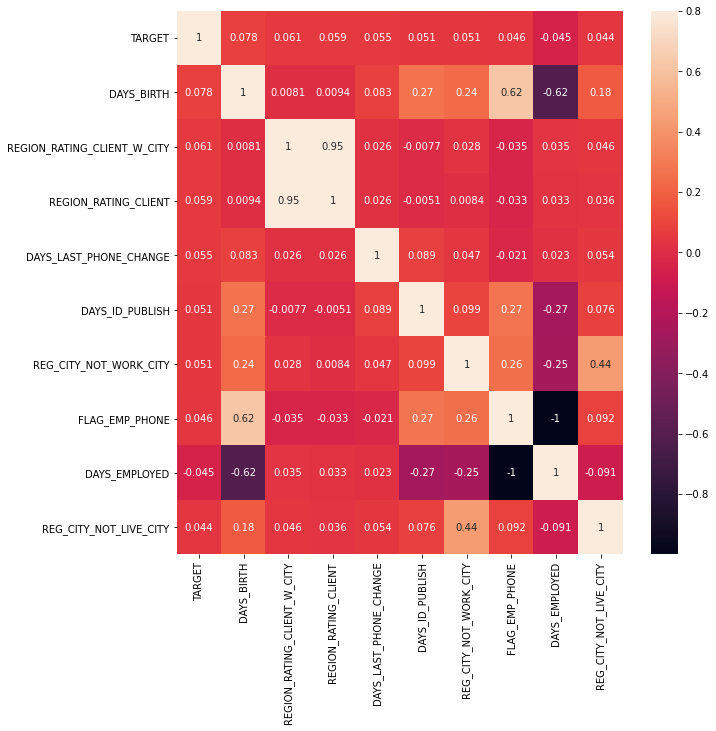

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(
    data[x_corr.index].corr(), 
    vmax=0.8, 
    annot=True, 
)
plt.show()

2.クレジットの分布を確認する

C:\Users\es\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

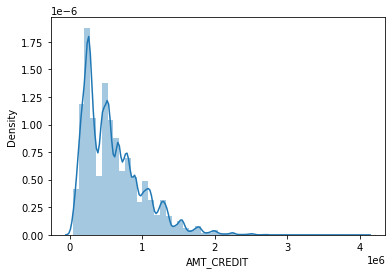

In [ ]:
display(sns.distplot(data['AMT_CREDIT']))

In [ ]:
data['AMT_CREDIT'].sort_values(ascending=False).head(10)

110459    4050000.0
14852     4050000.0
119681    4050000.0
120757    4050000.0
287732    4050000.0
17948     4050000.0
288455    4050000.0
133766    4050000.0
95571     4031032.5
186230    4027680.0
Name: AMT_CREDIT, dtype: float64

In [ ]:
data['AMT_CREDIT'].sort_values(ascending=True).head(10)

234628    45000.0
61970     45000.0
252332    45000.0
297306    45000.0
72466     45000.0
121919    45000.0
292281    45000.0
230133    45000.0
281083    45000.0
69537     45000.0
Name: AMT_CREDIT, dtype: float64

借入額の格差は100倍くらいある。ただし、分布は少額の借入額に寄っている。

3.収入の分布を確認する

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

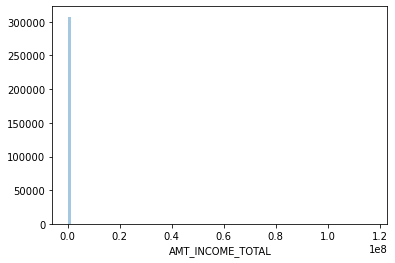

In [ ]:
display(sns.distplot(data['AMT_INCOME_TOTAL'], kde=False, rug=False, bins=100))

In [ ]:
data['AMT_INCOME_TOTAL'].sort_values(ascending=False).head(20)

203693    18000090.0
246858    13500000.0
77768      9000000.0
131127     6750000.0
204564     4500000.0
103006     4500000.0
287463     4500000.0
187833     4500000.0
181698     3950059.5
20216      3825000.0
49645      3600000.0
284311     3600000.0
82846      3375000.0
86026      3375000.0
101007     3150000.0
248159     3150000.0
107926     2930026.5
258773     2700000.0
298082     2475000.0
10222      2250000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
data['AMT_INCOME_TOTAL'].sort_values(ascending=True).head(10)

1678      25650.0
20727     25650.0
246104    26100.0
186643    26100.0
240137    26100.0
132707    26460.0
175433    26550.0
262748    26550.0
213274    27000.0
101746    27000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
# 外れ値（ID=12840,246858,77768,131127）を削除する必要がある。
data = data.drop(data.index[12840])
data = data.drop(data.index[246858])
data = data.drop(data.index[77768])
data = data.drop(data.index[131127])

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

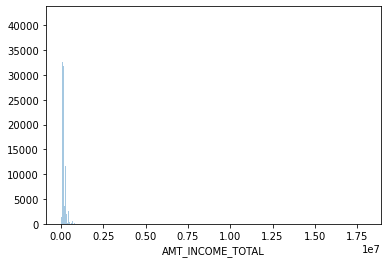

In [ ]:
display(sns.distplot(data['AMT_INCOME_TOTAL'], kde=False, rug=False, bins=1000))

所得の格差がみられる。

4.クレジットと収入の関係

C:\Users\es\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


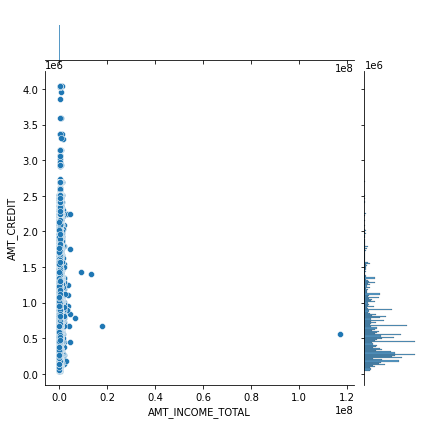

In [ ]:
sns.jointplot(data["AMT_INCOME_TOTAL"],data["AMT_CREDIT"])

5.クレジットと子供の数の関係

C:\Users\es\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


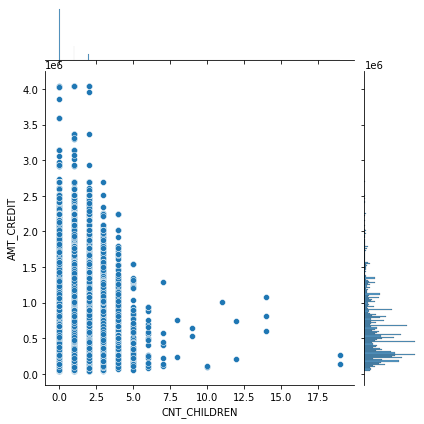

In [ ]:
sns.jointplot(data["CNT_CHILDREN"],data["AMT_CREDIT"])

子供の数とクレジットには、あまり相関は見られない

6.カテゴリー別の返済不履行の状況

6.1.現金かリボか

<AxesSubplot:xlabel='TARGET'>

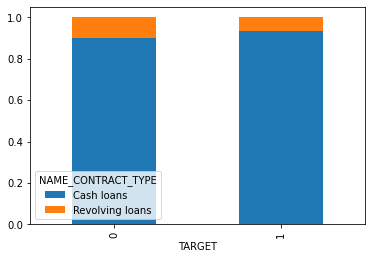

In [ ]:
std = pd.crosstab(data['TARGET'], data['NAME_CONTRACT_TYPE'], normalize='index')
std.plot.bar(stacked=True)

不履行状況に違いは見られない。

6.2.男女別

<AxesSubplot:xlabel='TARGET'>

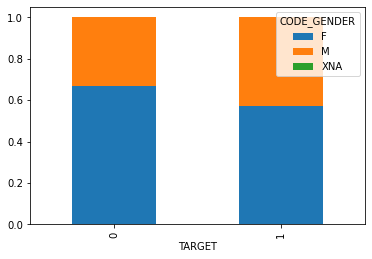

In [ ]:
std = pd.crosstab(data['TARGET'], data['CODE_GENDER'], normalize='index')
std.plot.bar(stacked=True)

男性のほうがやや不履行率が高い。

6.3.車所有有無

<AxesSubplot:xlabel='TARGET'>

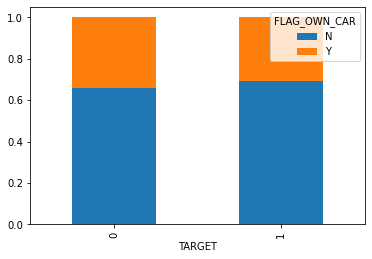

In [ ]:
std = pd.crosstab(data['TARGET'], data['FLAG_OWN_CAR'], normalize='index')
std.plot.bar(stacked=True)

車所有有無による違いは見られない。

6.4.不動産所有有無

<AxesSubplot:xlabel='TARGET'>

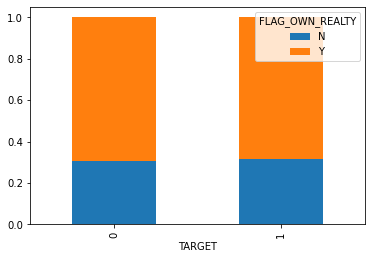

In [ ]:
std = pd.crosstab(data['TARGET'], data['FLAG_OWN_REALTY'], normalize='index')
std.plot.bar(stacked=True)

不動産所有有無による違いは見られない。

In [ ]:
NAME_INCOME_TYPE

6.5.所得の種類

C:\Users\es\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

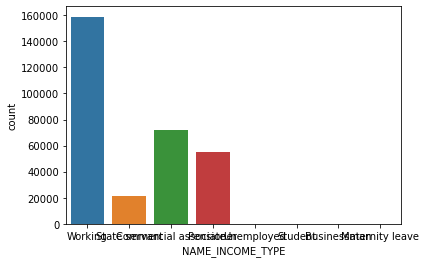

In [ ]:
sns.countplot(data["NAME_INCOME_TYPE"])

<AxesSubplot:xlabel='NAME_INCOME_TYPE'>

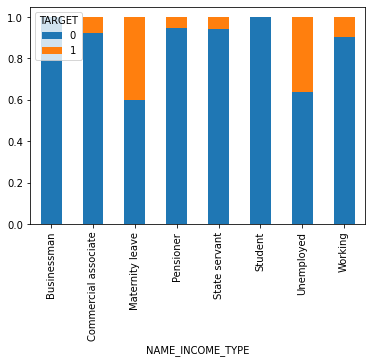

In [ ]:
std = pd.crosstab(data['NAME_INCOME_TYPE'],data['TARGET'],  normalize='index')
std.plot.bar(stacked=True)

不履行者に出産休暇中の人や不労者がやや多いと思われる。

6.6.教育の状況

C:\Users\es\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

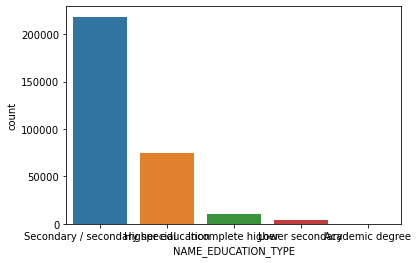

In [ ]:
sns.countplot(data["NAME_EDUCATION_TYPE"])

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE'>

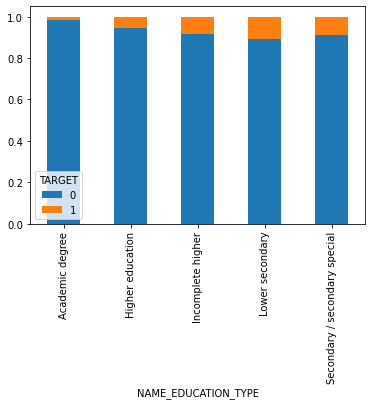

In [ ]:
std = pd.crosstab(data['NAME_EDUCATION_TYPE'],data['TARGET'], normalize='index')
std.plot.bar(stacked=True)

教育レベルが下がると不履行者が増加すると思われる。

6.7.家族状況

C:\Users\es\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='count'>

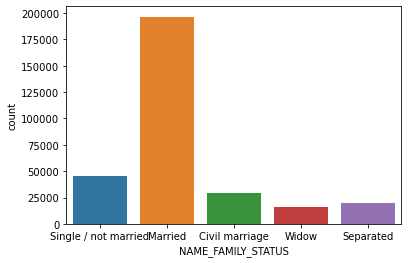

In [ ]:
sns.countplot(data["NAME_FAMILY_STATUS"])

<AxesSubplot:xlabel='NAME_FAMILY_STATUS'>

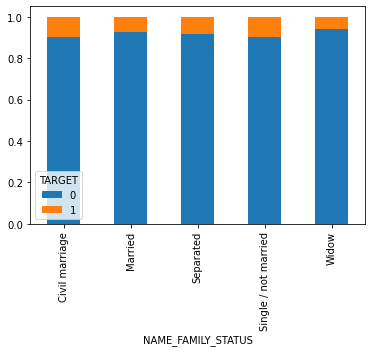

In [ ]:
std = pd.crosstab(data['NAME_FAMILY_STATUS'],data['TARGET'], normalize='index')
std.plot.bar(stacked=True)

家族状況による違いは見られない。

6.8.子供の数

C:\Users\es\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

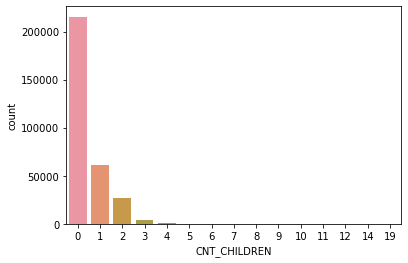

In [ ]:
sns.countplot(data["CNT_CHILDREN"])

<AxesSubplot:xlabel='CNT_CHILDREN'>

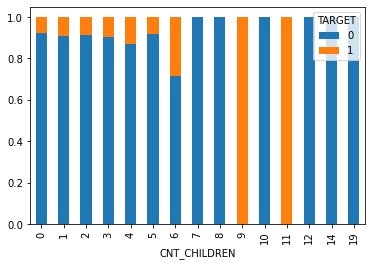

In [ ]:
std = pd.crosstab(data['CNT_CHILDREN'],data['TARGET'], normalize='index')
std.plot.bar(stacked=True)

6.9.住居の状況

C:\Users\es\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NAME_HOUSING_TYPE', ylabel='count'>

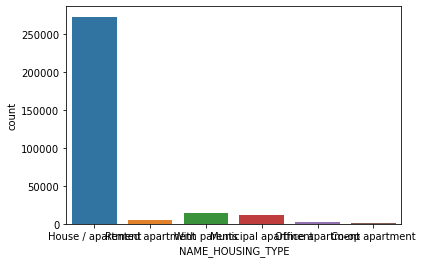

In [ ]:
sns.countplot(data["NAME_HOUSING_TYPE"])

<AxesSubplot:xlabel='NAME_HOUSING_TYPE'>

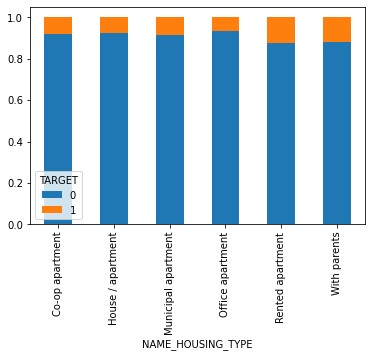

In [ ]:
std = pd.crosstab(data['NAME_HOUSING_TYPE'],data['TARGET'], normalize='index')
std.plot.bar(stacked=True)

住居の状況による違いは見られない

In [ ]:
# dataデータの先頭5行を表示
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


7.就労日数の確認

C:\Users\es\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Density'>

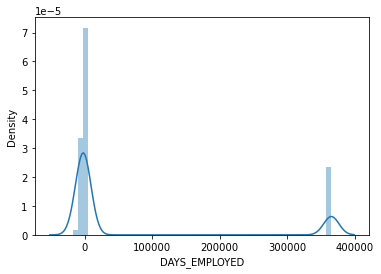

In [ ]:
sns.distplot(data['DAYS_EMPLOYED'])

In [ ]:
data['DAYS_EMPLOYED'].sort_values(ascending=False).head(10)

250124    365243
106526    365243
106614    365243
106601    365243
106593    365243
106591    365243
244215    365243
106585    365243
106582    365243
244219    365243
Name: DAYS_EMPLOYED, dtype: int64

In [ ]:
data['DAYS_EMPLOYED'].sort_values(ascending=True).head(10)

280994   -17912
273069   -17583
208899   -17546
35191    -17531
234168   -17522
142446   -17170
143265   -17139
296917   -16852
39095    -16849
249164   -16836
Name: DAYS_EMPLOYED, dtype: int64

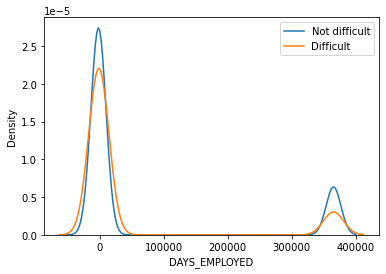

In [ ]:
t0 = data.loc[data["TARGET"]==0]
t1 = data.loc[data["TARGET"]==1]

sns.kdeplot(t0["DAYS_EMPLOYED"],label="Not difficult")
sns.kdeplot(t1["DAYS_EMPLOYED"],label="Difficult")
plt.legend()

就労日数に分布の偏りがある。それぞれで正規分布ができているが、正規分布を外れると不履行者が増える傾向にある。

8.最後に電話番号を変更してからの日数

C:\Users\es\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DAYS_LAST_PHONE_CHANGE', ylabel='Density'>

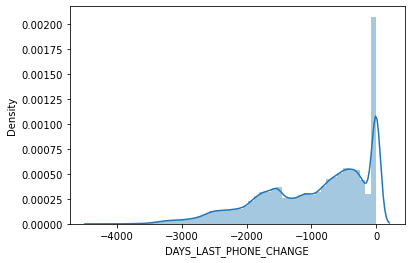

In [ ]:
sns.distplot(data['DAYS_LAST_PHONE_CHANGE'])

In [ ]:
data['DAYS_LAST_PHONE_CHANGE'].sort_values(ascending=True).head(10)

191568   -4292.0
137198   -4185.0
294270   -4173.0
101177   -4153.0
106063   -4131.0
156299   -4128.0
165599   -4121.0
287852   -4121.0
293406   -4118.0
262566   -4115.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [ ]:
data['DAYS_LAST_PHONE_CHANGE'].sort_values(ascending=False).head(10)

228784    0.0
47417     0.0
181884    0.0
181886    0.0
47379     0.0
119823    0.0
181888    0.0
47380     0.0
47381     0.0
119822    0.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

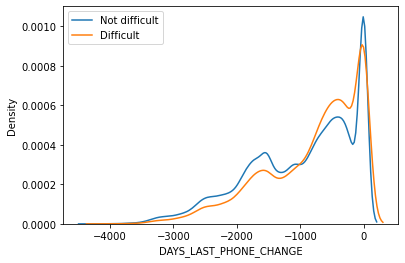

In [ ]:
t0 = data.loc[data["TARGET"]==0]
t1 = data.loc[data["TARGET"]==1]

sns.kdeplot(t0["DAYS_LAST_PHONE_CHANGE"],label="Not difficult")
sns.kdeplot(t1["DAYS_LAST_PHONE_CHANGE"],label="Difficult")
plt.legend()

最後に電話番号を変更してからの日数が短いほど、不履行者が増加している。